<a href="https://colab.research.google.com/github/PavanVinja/project_gss/blob/main/Project_GSS_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Summary**
Using the GSS data set, this paper explores the relationship between how the frequency of web use corelates with happiness, social trust, and outlook on life, amongst different ages and genders.
Our hypothesis is that there is a strong correlation between people who are unhappy and people who spend a long-time consuming media and the web. It is expected that the negative effects of the web prevail and hence social trust and output on life decreases as web uses increases, especially in the younger age brackets of all genders.
*UPDATE KEY FINDINGS. *



**Part 2: Code**

The analysis required the following variables measuring:
- **age:** Respondent’s age
- **sex:** Respondent’s sex
- **web health impact:** To what extent do you agree or disagree with the following statements? During the past 12 months, information on the internet... affected my health behavior in a positive way.
- **time:** How many minutes or hours per week do you use the Web?
- **happy:** Taken all together, how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy?
- **health:** Would you say your own health in general is
excellent, good, fair, or poor?
- **life:** In general, do you find life exciting, pretty routine, or dull

However, not all the data was clean. The next step after choosing the relevant variables was to clean and wrangle it.

For example, we had to coerce the 'hours online variable'.

In [2]:
!git clone https://github.com/PavanVinja/project_gss.git
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./project_gss/selected_gss_data.csv")
df.rename(columns = {'wwwhr' : 'hours_online'}, inplace = True )
df['hours_online'] = pd.to_numeric(df['hours_online'], errors = 'coerce')
df.head(5)

Cloning into 'project_gss'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 89 (delta 31), reused 10 (delta 8), pack-reused 49
Receiving objects: 100% (89/89), 24.79 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (40/40), done.


,age,sex,webhltbeh,hours_online,happy,health,life
0,23.0,female,NaN,NaN,not too happy,good,NaN
1,70.0,male,NaN,NaN,not too happy,fair,NaN
2,48.0,female,NaN,NaN,pretty happy,excellent,NaN
3,27.0,female,NaN,NaN,not too happy,good,NaN
4,61.0,female,NaN,NaN,pretty happy,good,NaN


Additionally, when looking at the relationship between HEALTH, GENDER, AND SOCIAL MEDIA HOURS, a boxplot was believed to be most accurate to represent this categorical data. But some of the values had to be imputed and removed before we could create the boxplot as seen in the steps below.

In [3]:
health_unique = df['health'].unique()
gender_unique = df['sex'].unique()
hours_unique = df['hours_online'].unique()

print("Health Unique", health_unique)
print("Gender Unique", gender_unique)
print("Hours Unique", hours_unique)

health_missing = df['health'].isnull().sum()
gender_missing = df['sex'].isnull().sum()
hours_missing = df['hours_online'].isnull().sum()

print(health_missing, gender_missing, hours_missing)

#NA for sex is so small so drop, also dropping health because hard to impute categorical variable
df = df.dropna(subset = ['sex', 'health', 'hours_online'])

#Impute values for hours_missing, commented out because with how many hours_online we are missing setting the rest to the mean results in little variation for graphs
#df['hours_online'].fillna(df['hours_online'].mean(), inplace = True)

Health Unique ['good' 'fair' 'excellent' 'poor' nan 'health']
Gender Unique ['female' 'male' 'sex' nan]
Hours Unique [ nan   5.   2.   1.   0.   6.   7.   8.   3.   4.  30.  10.  50.  21.
  23.  40.  12.  20.  16.  15.  60.  14.  25.  46.   9.  17.  13.  98.
  28.  42.  35.  45.  36.  11.  32. 112.  22.  24.  64.  29.  18. 100.
  48.  37.  27.  26.  65.  70. 130.  49.  72.  55.  75.  80. 168.  66.
 120.  38.  19.  84.  63.  33. 122.  90.  91. 132.  85. 140.  86.  34.
  56.  47.  43. 105.  95.  83.  57.  68. 125. 110. 150. 160.  39.  96.
  54.  76.  51. 119.  41. 126.]
17236 112 55206


**Results**
*Overall results to be updated at the end*


At first glance, the hours online and happiness do not seem to support the hypothesis. As the table below shows, most of the surveyed population use the web for less than an hour a day (5 hours / weekly). Additionally, across all the 4 categories for web usage 5 hours, 5-10 hours, 10-15 hours, 15+ hours, we can see the distribution of people who are in 'good' health condition is the highest. Following this for all categories the excellent health condition comes next, and then fair with just a small number of people in poor condition. This supports the idea that health does not decrease with hours spent on the web, as if this was the case, we would have expected to see an increase in the proportion of people in the fair and poor category as the hours spent on the web increased.

<ipython-input-4-496efa8786dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors = 'coerce').astype('Int64')
<ipython-input-4-496efa8786dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_online_bins'] = pd.cut(df['hours_online'], bins=bins, labels=labels)


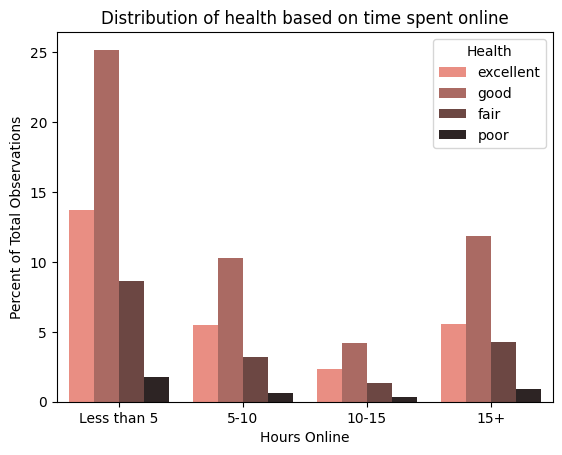

In [4]:
df['age'] = pd.to_numeric(df['age'], errors = 'coerce').astype('Int64')
bins = [-1, 5, 10, 15, 100]
labels = ['Less than 5', '5-10', '10-15', '15+']
df['hours_online_bins'] = pd.cut(df['hours_online'], bins=bins, labels=labels)

sns.countplot(x='hours_online_bins', hue='health', data=df, stat='percent', palette = 'dark:salmon_r')
plt.xlabel('Hours Online')
plt.ylabel('Percent of Total Observations')
plt.title('Distribution of health based on time spent online')
plt.legend(title='Health')


The exploration between age, hours on the web, and health along with gender, hours on the web, and health do not show any differentiating results. The average, person surveyed was around 40 years old, and the age group with the most hours online was around 35 years of age. Across gender is seemed like males used the web slightly more but no significant difference on health. This doesn't lead to any concrete conclusions, but does allign with the stereotypes that the younger generation tend to be more involved on the web compared to the elder generations.

<ipython-input-5-d8bab1581471>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['happy', 'sex']).mean().reset_index()


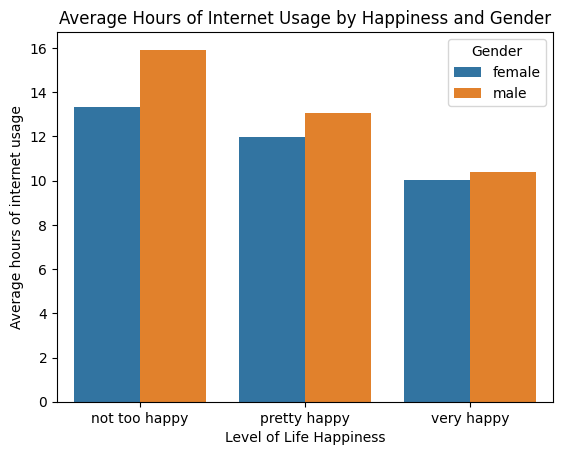

In [5]:
# First group data by happiness types and gender and calculate average hours
grouped_data = df.groupby(['happy', 'sex']).mean().reset_index()

# Plot the histogram using seaborn
sns.barplot(data=grouped_data, x='happy', y='hours_online', hue='sex')

plt.xlabel('Level of Life Happiness')
plt.ylabel('Average hours of internet usage')
plt.title('Average Hours of Internet Usage by Happiness and Gender')
plt.legend(title='Gender')

plt.show()

**Conclusion**

This project utilized the General Social Survey (GSS) dataset to investigate the correlation between web usage frequency and happiness, social trust, and outlook on life across different age groups and genders. The hypothesis suggested a strong link between increased web usage and decreased levels of happiness, social trust, and life outlook, particularly among younger demographics.

Key findings from the analysis revealed that while there was a considerable variation in web usage patterns among respondents, the data did not strongly support the initial hypothesis. Surprisingly, there was no significant association observed between hours spent online and measures of happiness, social trust, or life outlook. Additionally, the analysis did not yield substantial differences in these variables across age groups and genders. However, the methodology employed in this study faced several criticisms and limitations. These included a limited selection of variables that may not fully capture the complex relationship between web use and well-being, the absence of data regarding the quality of web interactions, and the assumption of a unidirectional negative impact of web use on well-being without considering reverse causality. Moreover, the study's focus on a single year of data limited the ability to discern long-term trends or changes over time. Despite these limitations, this project presents valuable insights and opens avenues for future research.

Overall, while this study provides initial insights into the relationship between web usage and well-being, further research is needed to elucidate the complex dynamics at play and inform more nuanced conclusions.


**Criticisms of the Method:**

- Limited variable selection: The chosen variables might not comprehensively capture the complex relationship between web use, happiness, social trust, and outlook on life. If factors like: Type of web use, differentiate between social media, news, entertainment, etc. were included more enhanced conclusions could have been made about the effects of specific types of the web.  
- Quality of web interactions: No variables were used to record if web interactions were inherently positive or negative.
- Social support network: Given how broad health is as a measure there could have been accounting for offline social connections that might influence well-being.
- Direction of causality: The study assumes web use negatively affects well-being, but the reverse could also be true (unhappy people using web more for coping).
- Time period: Looking at the data for just one year did not allow for the identification of trends over periods like if overall health has decreased or if hours spent on the web has increased.

**Future research opportunities**

- Conduct a literature review: Explore existing research on web use, happiness, social trust, and life outlook to identify potential gaps and refine your research questions.
- Refine your research question: Based on the identified limitations and areas for improvement, formulate a more specific and nuanced research question.
- Collect additional data: If possible, gather data from a broader demographic and consider using longitudinal studies.
- Disseminate your findings: Share your research through presentations, publications, or reports to contribute to gain from the greater communities’ depth of knowledge or other forms of analysis/research.